In [174]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [175]:
# import data 
data = pd.read_csv('/Users/arthurrastelli/Desktop/DS/Assignment/Assignment.csv')
data = data.rename(columns= {'duree': 'expo','nbrtotan': 'freq','nbrtotc': 'nclaims'})
data["sev"] = data['chargtot']/data['nclaims']
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163657 entries, 0 to 163656
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AGEPH     163657 non-null  int64  
 1   CODPOSS   163657 non-null  int64  
 2   expo      163657 non-null  float64
 3   lnexpo    163657 non-null  float64
 4   nclaims   163657 non-null  int64  
 5   freq      163657 non-null  float64
 6   chargtot  163657 non-null  float64
 7   agecar    163657 non-null  object 
 8   sexp      163657 non-null  object 
 9   fuelc     163657 non-null  object 
 10  split     163657 non-null  object 
 11  usec      163657 non-null  object 
 12  fleetc    163657 non-null  object 
 13  sportc    163657 non-null  object 
 14  coverp    163657 non-null  object 
 15  powerc    163657 non-null  object 
 16  sev       18345 non-null   float64
dtypes: float64(5), int64(3), object(9)
memory usage: 21.2+ MB


,AGEPH,CODPOSS,expo,lnexpo,nclaims,freq,chargtot,agecar,sexp,fuelc,split,usec,fleetc,sportc,coverp,powerc,sev
0,64,1000,1.000000,0.000000,0,0.000000,0.000000,2-5,Female,Petrol,Once,Private,No,No,MTPL+,66-110,NaN
1,28,1000,0.046575,-3.066684,1,21.470588,155.974606,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110,155.974606
2,58,1000,0.402740,-0.909465,0,0.000000,0.000000,>10,Female,Petrol,Thrice,Private,No,No,MTPL,<66,NaN
3,37,1030,0.169863,-1.772763,0,0.000000,0.000000,2-5,Female,Petrol,Once,Professional,No,No,MTPL+++,66-110,NaN
4,29,1030,1.000000,0.000000,0,0.000000,0.000000,6-10,Female,Petrol,Once,Private,No,No,MTPL+,<66,NaN


In [176]:
KULbg =  "#116E8A"

EXPLORING THE VARIABLES
- Change the variables in the functions (second argument)
- See what graph is the most interestin for the data type

In [187]:
def grouped(x):
    grouped = data.groupby(x).agg({
    'nclaims':'sum',
    'expo': 'sum',
    'chargtot': 'sum'
    })
    grouped['absph'] = data[x].value_counts()
    grouped['relph'] = grouped['absph']/grouped['absph'].sum()
    grouped['emp_freq'] = grouped['nclaims']/grouped['expo']
    grouped.reset_index(inplace=True)
    return   grouped

1.1 AGEPH

In [189]:
age = grouped('AGEPH')
age

,AGEPH,nclaims,expo,chargtot,absph,relph,emp_freq
0,17,0,1.693151,0.000000,2,0.000012,0.000000
1,18,5,4.890411,9222.457170,17,0.000104,1.022409
2,19,28,93.021918,50489.862394,116,0.000709,0.301004
3,20,113,342.284932,158953.467906,393,0.002401,0.330134
4,21,166,600.219178,619270.027935,704,0.004302,0.276566
...,...,...,...,...,...,...,...
74,91,1,11.827397,1471.793435,12,0.000073,0.084549
75,92,4,13.232877,4743.640911,16,0.000098,0.302277
76,93,0,7.167123,0.000000,9,0.000055,0.000000
77,94,0,3.000000,0.000000,3,0.000018,0.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


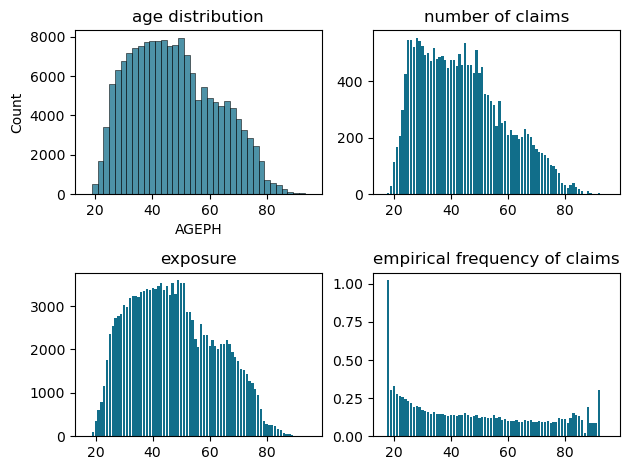

In [173]:
plt.subplot(2,2,1)
sns.histplot(data=data, x='AGEPH', stat='count', binwidth=2, color=KULbg)
plt.title('age distribution')

plt.subplot(2,2,2)
plt.bar(data=age, x='AGEPH', height='nclaims',color=KULbg)
plt.title('number of claims')

plt.subplot(2,2,3)
plt.bar(data=age, x='AGEPH', height='expo',color=KULbg)
plt.title('exposure')

plt.subplot(2,2,4)
plt.bar(data=age, x='AGEPH', height='emp_freq', color=KULbg)
plt.title('empirical frequency of claims')

plt.tight_layout()

1.2 CODPOSS

In [269]:
codposs = grouped('CODPOSS')
codposs = codposs.sort_values(by='nclaims', ascending=False)
codposs

bins = [1000, 1300, 1500, 2000, 3000, 3500, 4000, 5000, 6000, 6600, 7000, 8000, 9000, 10000]
labels = [
    'BHG', 
    'WB', 
    'VB', 
    'Antwerpen', 
    'VB2',  # Second interval for Vlaams-Brabant
    'Lim', 
    'Lui', 
    'N', 
    'H', 
    'Lux', 
    'H2',  # Second interval for Henegouwen
    'WV', 
    'OV'
]

codposs['region']=pd.cut(codposs['CODPOSS'], bins=bins,labels=labels,right=False)
codposs = codposs.drop(columns='CODPOSS')

codposs.reset_index()

codposs.loc[codposs['region'].isin(['H2', 'H']), 'region'] = 'H'
codposs.loc[codposs['region'].isin(['VB', 'VB2']), 'region'] = 'VB'
codposs = codposs.groupby('region').agg({
    'nclaims': 'sum',
    'expo': 'sum',
    'chargtot': 'sum',
    'absph': 'sum',
    'relph': 'sum',
    'emp_freq':'sum'
})
codposs.reset_index()
codposs = codposs.sort_values(by='nclaims',ascending=False)
codposs = codposs.head(11)
codposs.reset_index()

/var/folders/mq/487s_vq1171byqhf182vs0n40000gn/T/ipykernel_25814/748555091.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  codposs = codposs.groupby('region').agg({


,region,nclaims,expo,chargtot,absph,relph,emp_freq
0,H,4475,34161.043836,8.280793e+06,37771,0.230794,8.206746
1,Lui,2705,19135.750685,3.340034e+06,21809,0.133260,10.699792
2,Antwerpen,2330,17771.123288,3.667861e+06,19784,0.120887,8.499716
3,OV,2228,15561.312329,3.838862e+06,17121,0.104615,8.589458
4,BHG,1925,8188.019178,2.300166e+06,9901,0.060498,4.421635
5,WV,1918,14512.367123,3.724288e+06,15946,0.097435,7.990024
6,VB,1597,11989.178082,2.189970e+06,13747,0.083999,8.343617
7,N,944,7789.183562,1.715293e+06,8795,0.053740,4.153680
8,Lim,935,7315.150685,1.736757e+06,8151,0.049805,5.291940
9,WB,854,5684.909589,1.551399e+06,6680,0.040817,3.961886


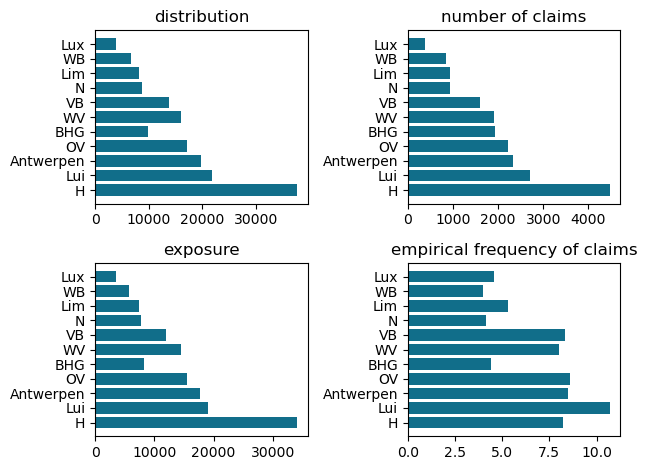

In [272]:
plt.subplot(2,2,1)
plt.barh(codposs.index,codposs['absph'],color=KULbg)
plt.title('distribution')

plt.subplot(2,2,2)
plt.barh(codposs.index,codposs['nclaims'],color=KULbg)
plt.title('number of claims')

plt.subplot(2,2,3)
plt.barh(codposs.index,codposs['expo'],color=KULbg)
plt.title('exposure')

plt.subplot(2,2,4)
plt.barh(codposs.index,codposs['emp_freq'],color=KULbg)
plt.title('empirical frequency of claims')

plt.tight_layout()
plt.show()

1.3 AGECAR

In [274]:
agecar = grouped('agecar')
agecar

,agecar,nclaims,expo,chargtot,absph,relph,emp_freq
0,0-1,1115,6570.191781,1.975692e+06,7766,0.047453,0.169706
1,2-5,6029,46189.060274,8.671438e+06,51559,0.315043,0.130529
2,6-10,8453,60555.106849,1.328777e+07,67151,0.410315,0.139592
3,>10,4693,32305.369863,8.976585e+06,37181,0.227189,0.145270


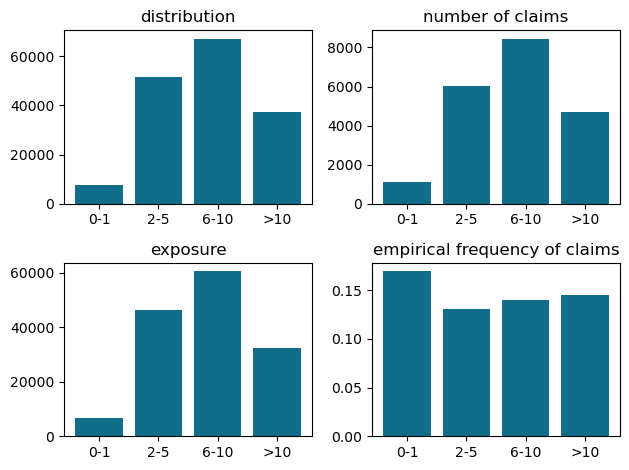

In [279]:
plt.subplot(2,2,1)
plt.bar(agecar['agecar'], agecar['absph'],color=KULbg)
plt.title('distribution')

plt.subplot(2,2,2)
plt.bar(agecar['agecar'], agecar['nclaims'],color=KULbg)
plt.title('number of claims')

plt.subplot(2,2,3)
plt.bar(agecar['agecar'], agecar['expo'],color=KULbg)
plt.title('exposure')

plt.subplot(2,2,4)
plt.bar(agecar['agecar'], agecar['emp_freq'],color=KULbg)
plt.title('empirical frequency of claims')

plt.tight_layout()

1.4 FUELC

In [280]:
fuelc = grouped('fuelc')


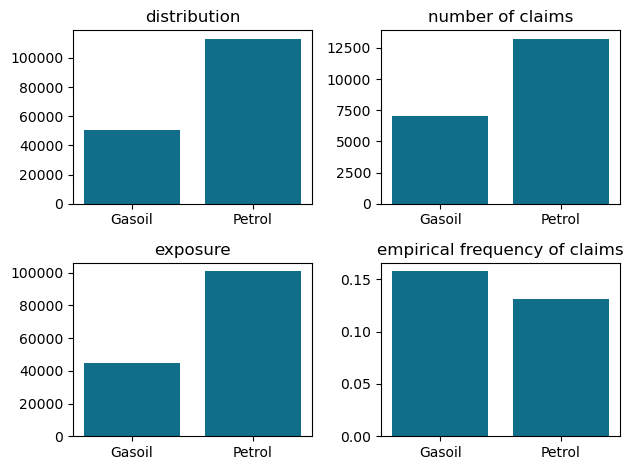

In [284]:
plt.subplot(2,2,1)
plt.bar(fuelc['fuelc'], fuelc['absph'],color=KULbg)
plt.title('distribution')

plt.subplot(2,2,2)
plt.bar(fuelc['fuelc'], fuelc['nclaims'],color=KULbg)
plt.title('number of claims')

plt.subplot(2,2,3)
plt.bar(fuelc['fuelc'], fuelc['expo'],color=KULbg)
plt.title('exposure')

plt.subplot(2,2,4)
plt.bar(fuelc['fuelc'], fuelc['emp_freq'],color=KULbg)
plt.title('empirical frequency of claims')

plt.tight_layout()

1.4 AGECAR

In [283]:
agecar = grouped('agecar')

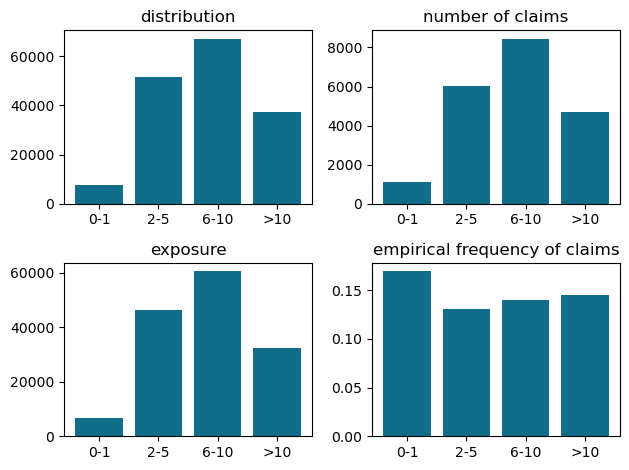

In [285]:
plt.subplot(2,2,1)
plt.bar(agecar['agecar'], agecar['absph'],color=KULbg)
plt.title('distribution')

plt.subplot(2,2,2)
plt.bar(agecar['agecar'], agecar['nclaims'],color=KULbg)
plt.title('number of claims')

plt.subplot(2,2,3)
plt.bar(agecar['agecar'], agecar['expo'],color=KULbg)
plt.title('exposure')

plt.subplot(2,2,4)
plt.bar(agecar['agecar'], agecar['emp_freq'],color=KULbg)
plt.title('empirical frequency of claims')

plt.tight_layout()

1.5 COVERP

In [287]:
coverp = grouped('coverp')

,coverp,nclaims,expo,chargtot,absph,relph,emp_freq
0,MTPL,12261,84012.597260,2.111275e+07,95409,0.582981,0.145942
1,MTPL+,5342,41759.449315,6.867398e+06,46073,0.281522,0.127923
2,MTPL+++,2687,19847.682192,4.931330e+06,22175,0.135497,0.135381


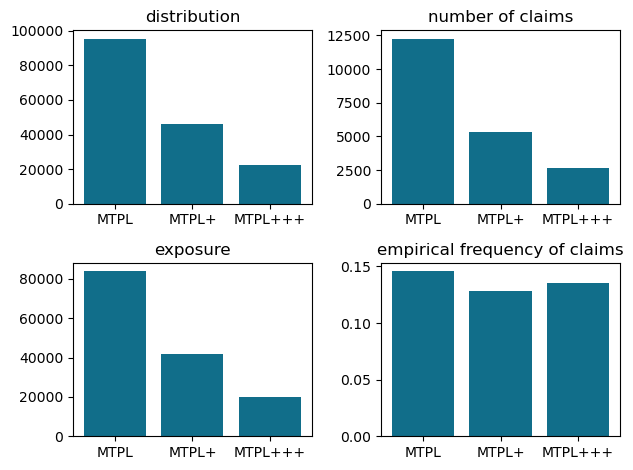

In [291]:
plt.subplot(2,2,1)
plt.bar(coverp['coverp'], coverp['absph'],color=KULbg)
plt.title('distribution')

plt.subplot(2,2,2)
plt.bar(coverp['coverp'], coverp['nclaims'],color=KULbg)
plt.title('number of claims')

plt.subplot(2,2,3)
plt.bar(coverp['coverp'], coverp['expo'],color=KULbg)
plt.title('exposure')

plt.subplot(2,2,4)
plt.bar(coverp['coverp'], coverp['emp_freq'],color=KULbg)
plt.title('empirical frequency of claims')

plt.tight_layout()

1.5 POWERC

In [289]:
powerc = grouped('powerc')

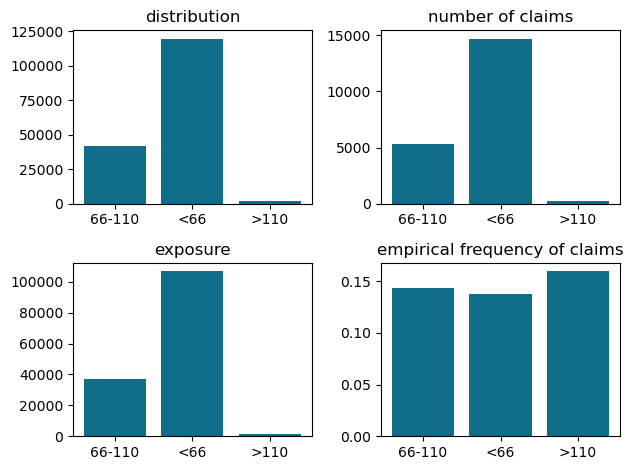

In [292]:
plt.subplot(2,2,1)
plt.bar(powerc['powerc'], powerc['absph'],color=KULbg)
plt.title('distribution')

plt.subplot(2,2,2)
plt.bar(powerc['powerc'], powerc['nclaims'],color=KULbg)
plt.title('number of claims')

plt.subplot(2,2,3)
plt.bar(powerc['powerc'], powerc['expo'],color=KULbg)
plt.title('exposure')

plt.subplot(2,2,4)
plt.bar(powerc['powerc'], powerc['emp_freq'],color=KULbg)
plt.title('empirical frequency of claims')

plt.tight_layout()

1.6 FLEET C

In [293]:
fleetc = grouped('fleetc')

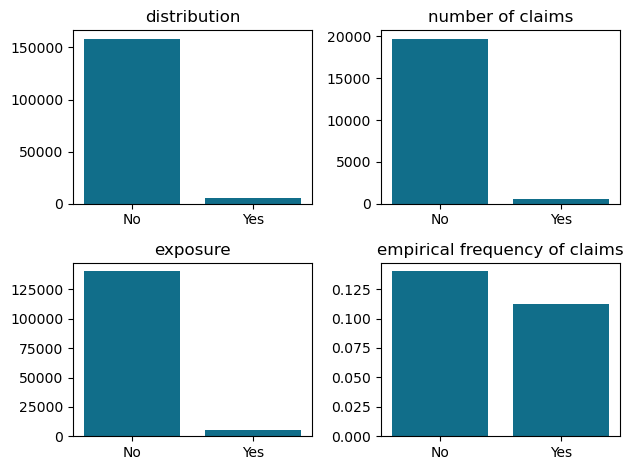

In [295]:
plt.subplot(2,2,1)
plt.bar(fleetc['fleetc'], fleetc['absph'],color=KULbg)
plt.title('distribution')

plt.subplot(2,2,2)
plt.bar(fleetc['fleetc'], fleetc['nclaims'],color=KULbg)
plt.title('number of claims')

plt.subplot(2,2,3)
plt.bar(fleetc['fleetc'], fleetc['expo'],color=KULbg)
plt.title('exposure')

plt.subplot(2,2,4)
plt.bar(fleetc['fleetc'], fleetc['emp_freq'],color=KULbg)
plt.title('empirical frequency of claims')

plt.tight_layout()

1.7 USEC

In [300]:
usec = grouped('usec')
usec

,usec,nclaims,expo,chargtot,absph,relph,emp_freq
0,Private,19290,138394.630137,3.146557e+07,155652,0.951087,0.139384
1,Professional,1000,7225.098630,1.445910e+06,8005,0.048913,0.138406


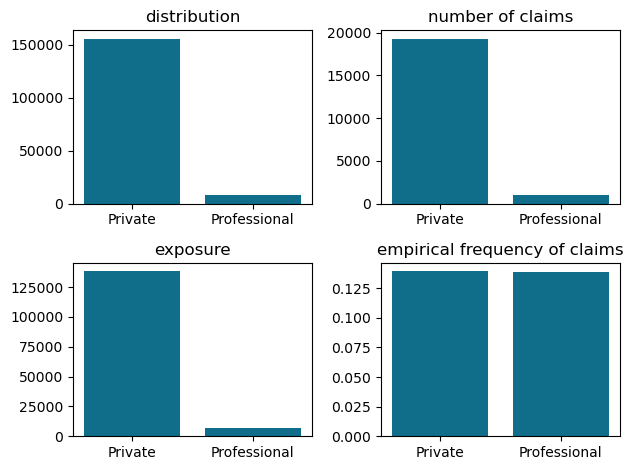

In [297]:
plt.subplot(2,2,1)
plt.bar(usec['usec'], usec['absph'],color=KULbg)
plt.title('distribution')

plt.subplot(2,2,2)
plt.bar(usec['usec'], usec['nclaims'],color=KULbg)
plt.title('number of claims')

plt.subplot(2,2,3)
plt.bar(usec['usec'], usec['expo'],color=KULbg)
plt.title('exposure')

plt.subplot(2,2,4)
plt.bar(usec['usec'], usec['emp_freq'],color=KULbg)
plt.title('empirical frequency of claims')

plt.tight_layout()

1.8 SPORTC

In [298]:
sportc = grouped('sportc')

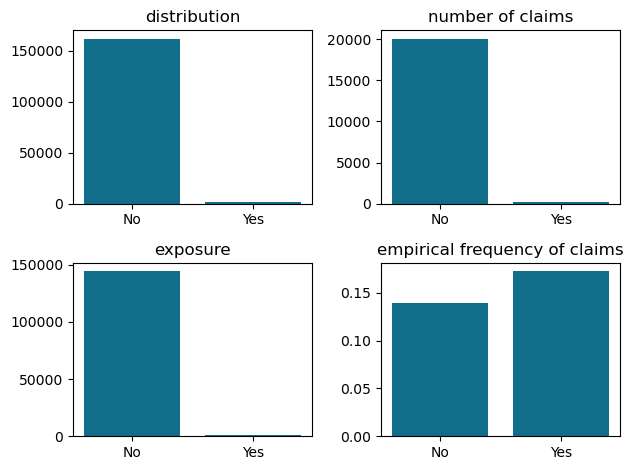

In [299]:
plt.subplot(2,2,1)
plt.bar(sportc['sportc'], sportc['absph'],color=KULbg)
plt.title('distribution')

plt.subplot(2,2,2)
plt.bar(sportc['sportc'], sportc['nclaims'],color=KULbg)
plt.title('number of claims')

plt.subplot(2,2,3)
plt.bar(sportc['sportc'], sportc['expo'],color=KULbg)
plt.title('exposure')

plt.subplot(2,2,4)
plt.bar(sportc['sportc'], sportc['emp_freq'],color=KULbg)
plt.title('empirical frequency of claims')

plt.tight_layout()